In [1]:
cd ../ms_lesion_seg/

/home/sam/projects/ms_lesion_seg/ms_lesion_seg


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import numpy as np
import nibabel as nib
import os
import sys
from utils.plot import *
from utils.train_loader import TrainLoader
from torch.utils.data import DataLoader

In [4]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['font.size'] = 22
plt.rcParams['image.cmap'] = 'Greys_r'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['image.interpolation'] = 'nearest'

In [5]:
data_dir = Path("/iacl/pg20/sam/data/ms_lesions_2021/validation")

In [6]:
patch_size = (128, 128, 1)
batch_size = 4
n_steps = 10

In [7]:
ds = TrainLoader(
    data_dir=data_dir,
    patch_size=patch_size,
    drop_idx=0,
    n_steps=n_steps,
)

data_loader = DataLoader(
    ds,
    batch_size=batch_size,
    shuffle=True,
    pin_memory=False,
    num_workers=8,
) 

==================== Loading images into RAM ====================


100%|███████████████████████████████████████████████████████████████████| 8/8 [00:14<00:00,  1.83s/it]


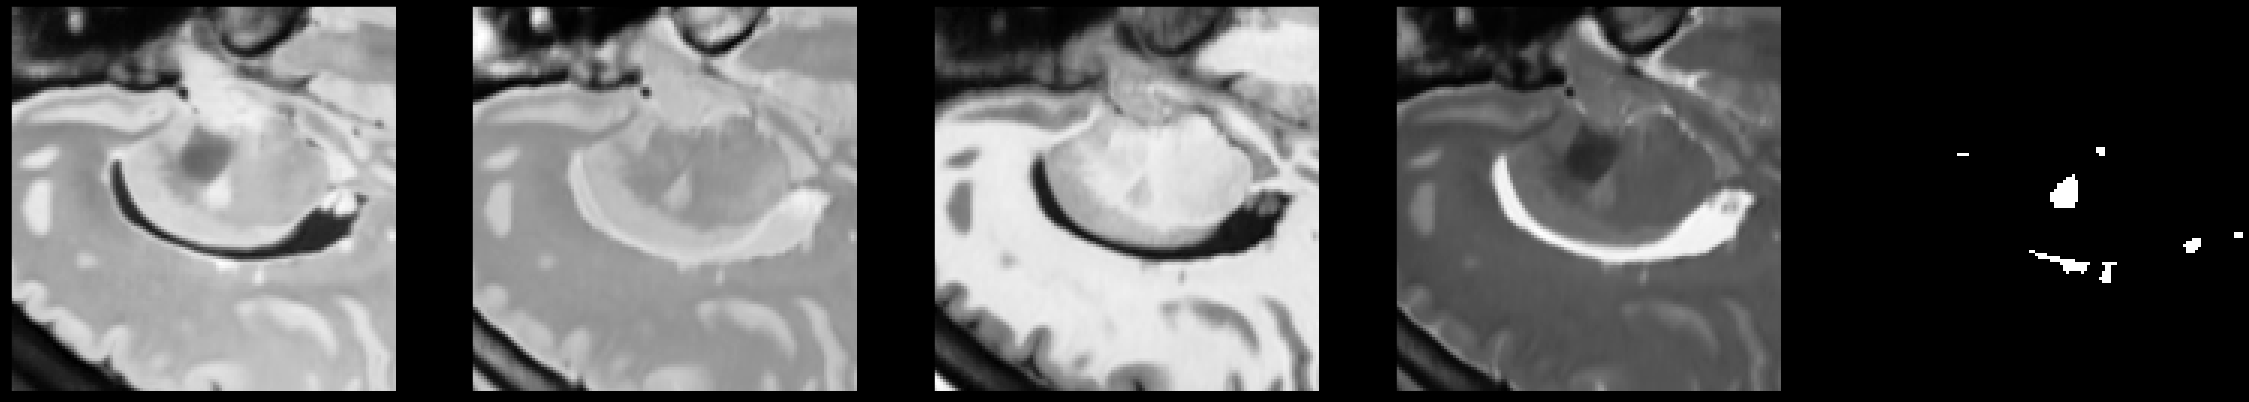

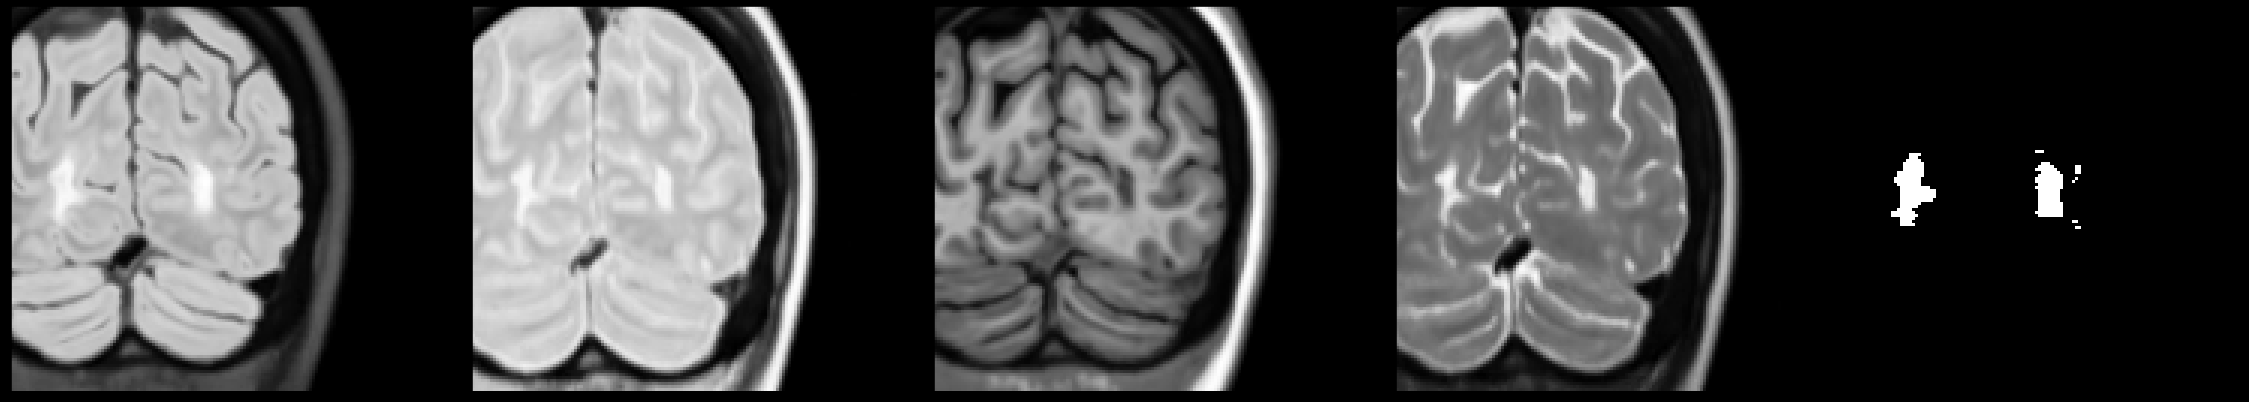

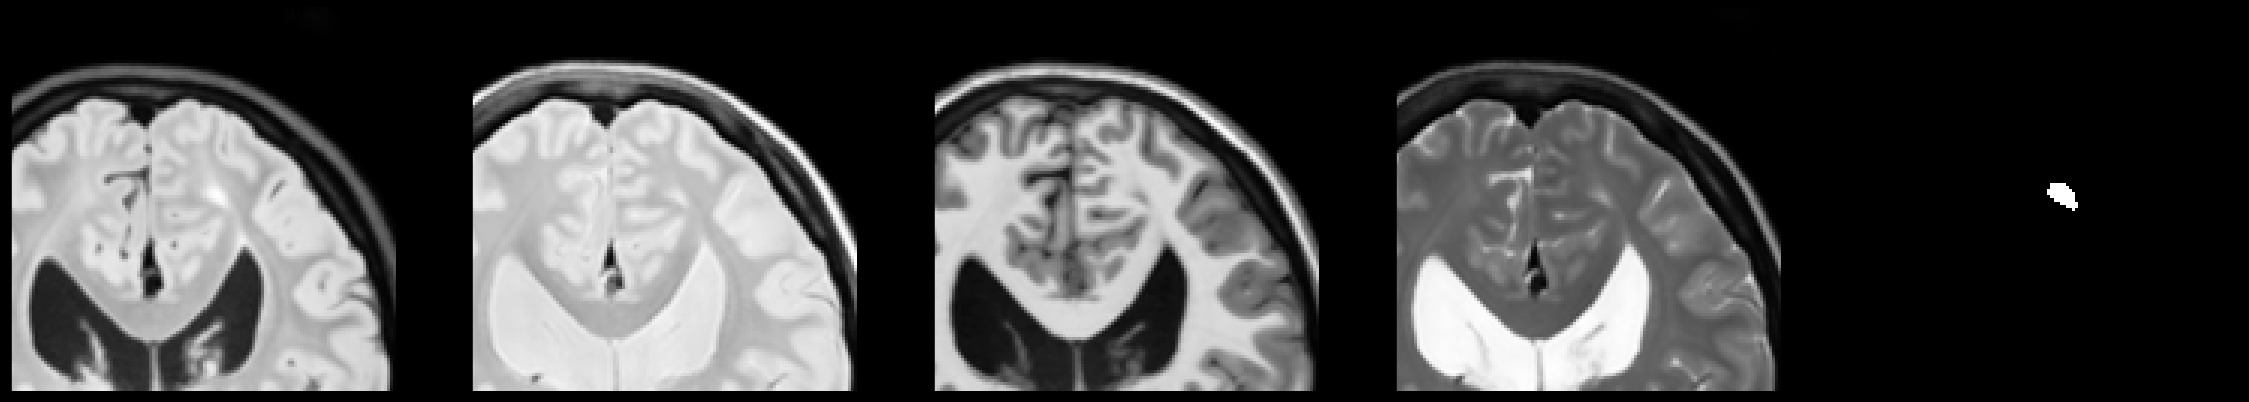

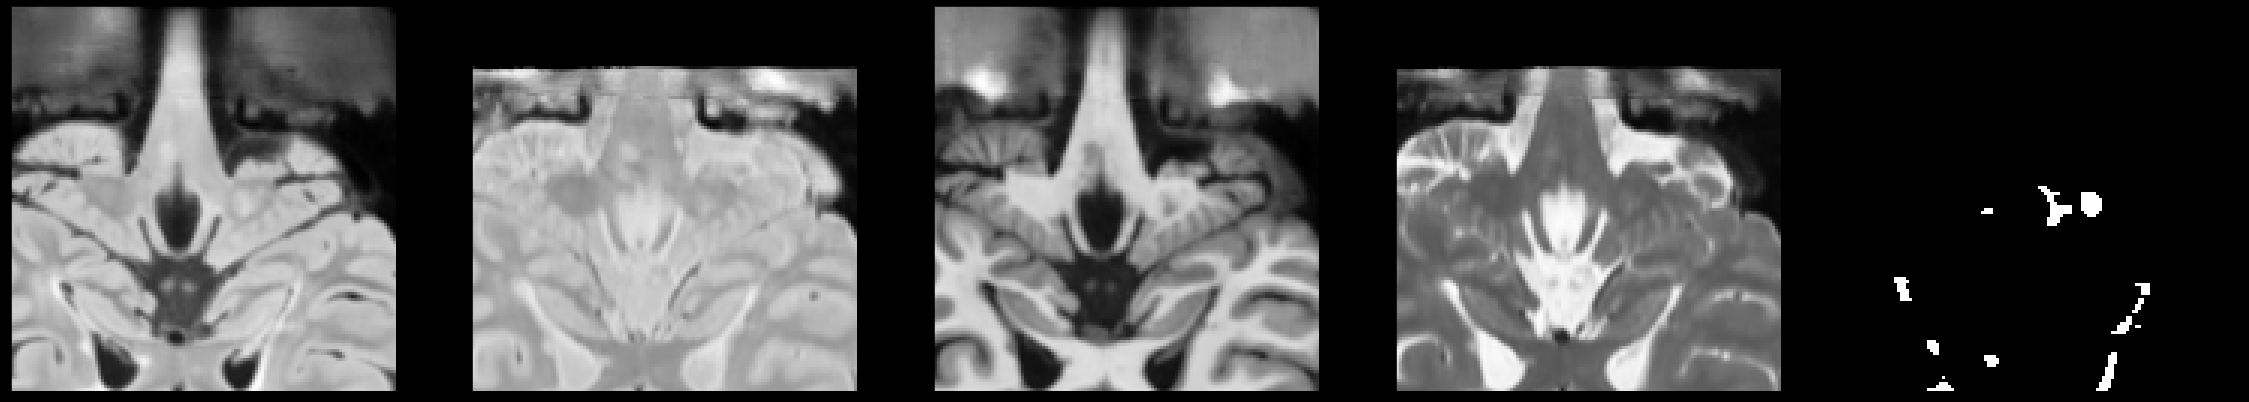

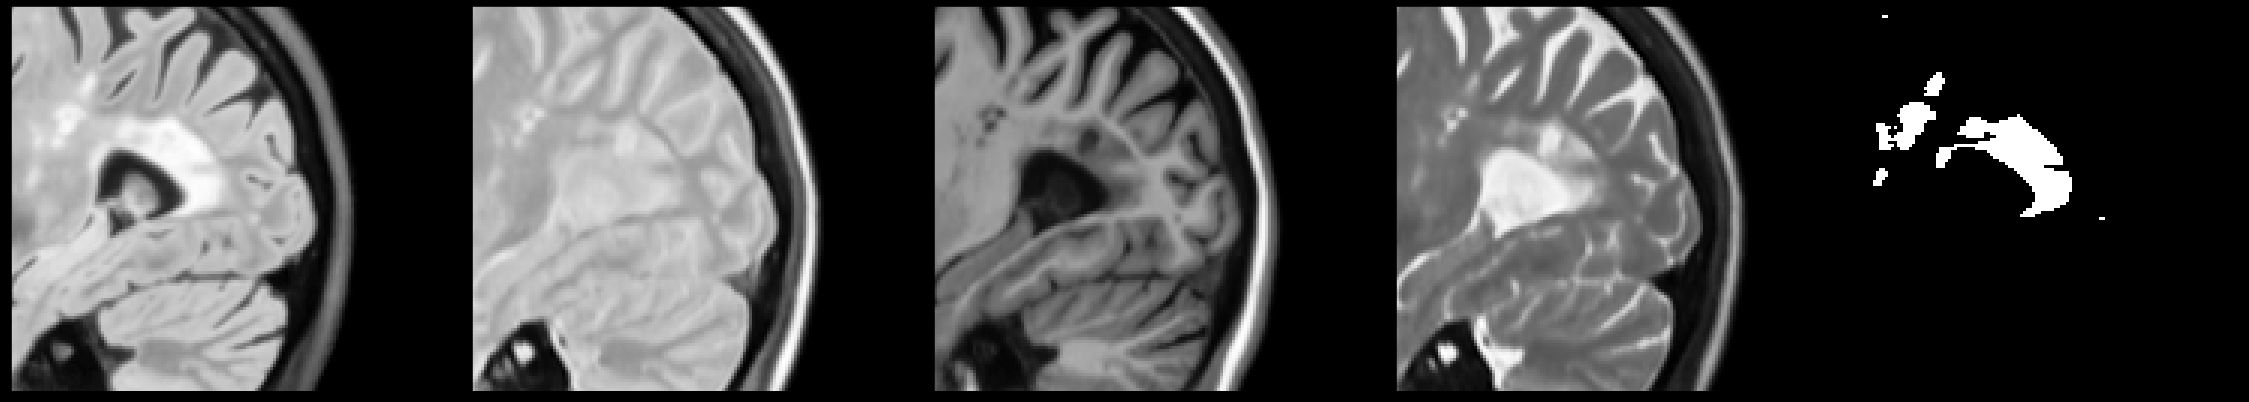

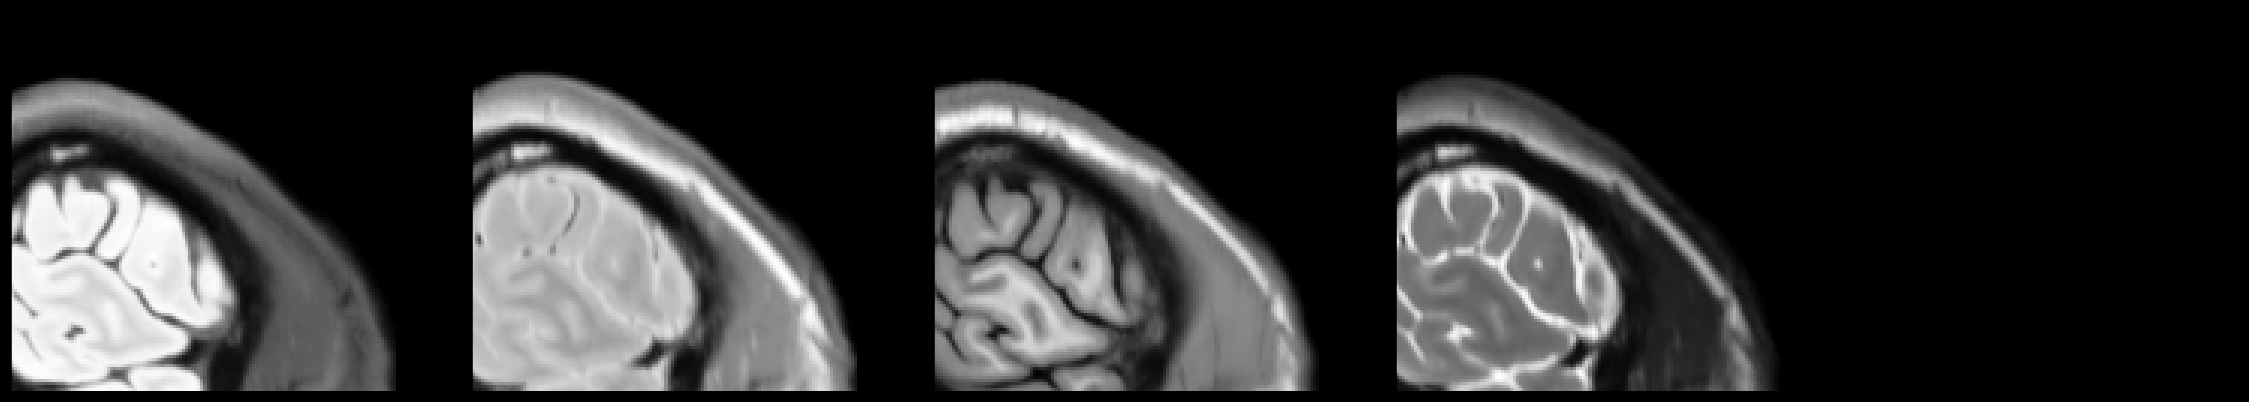

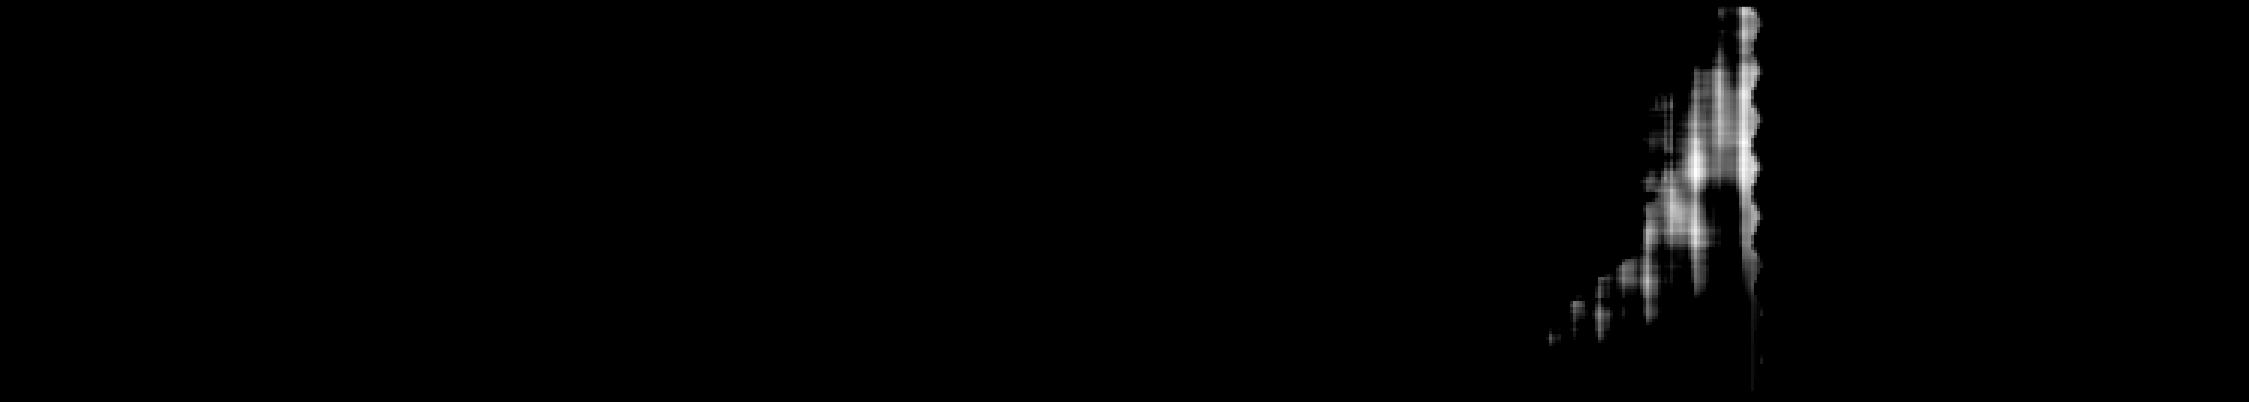

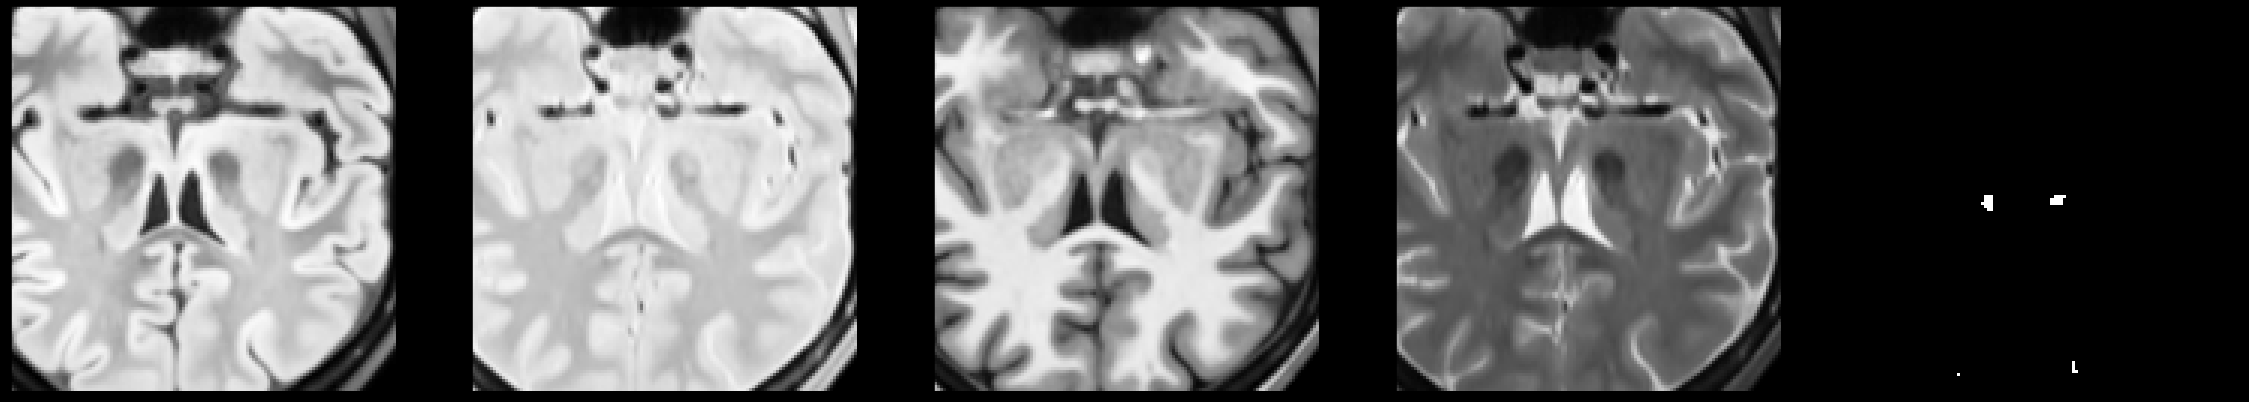

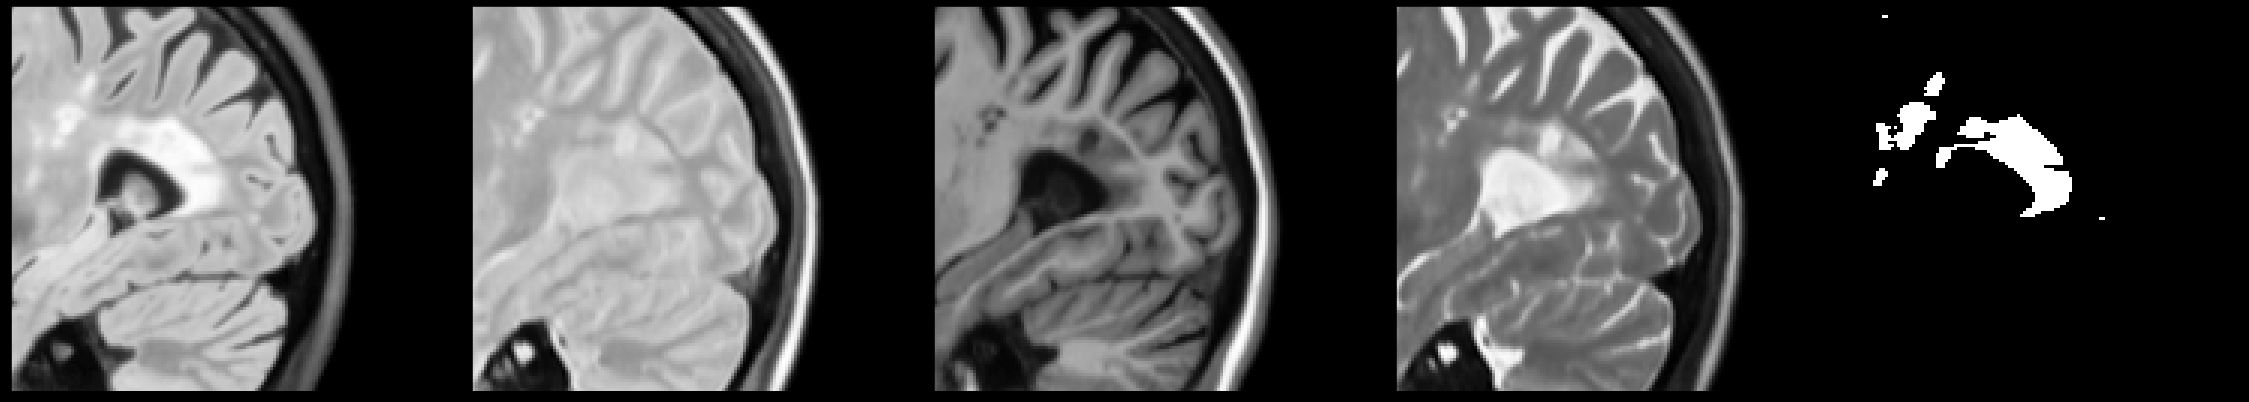

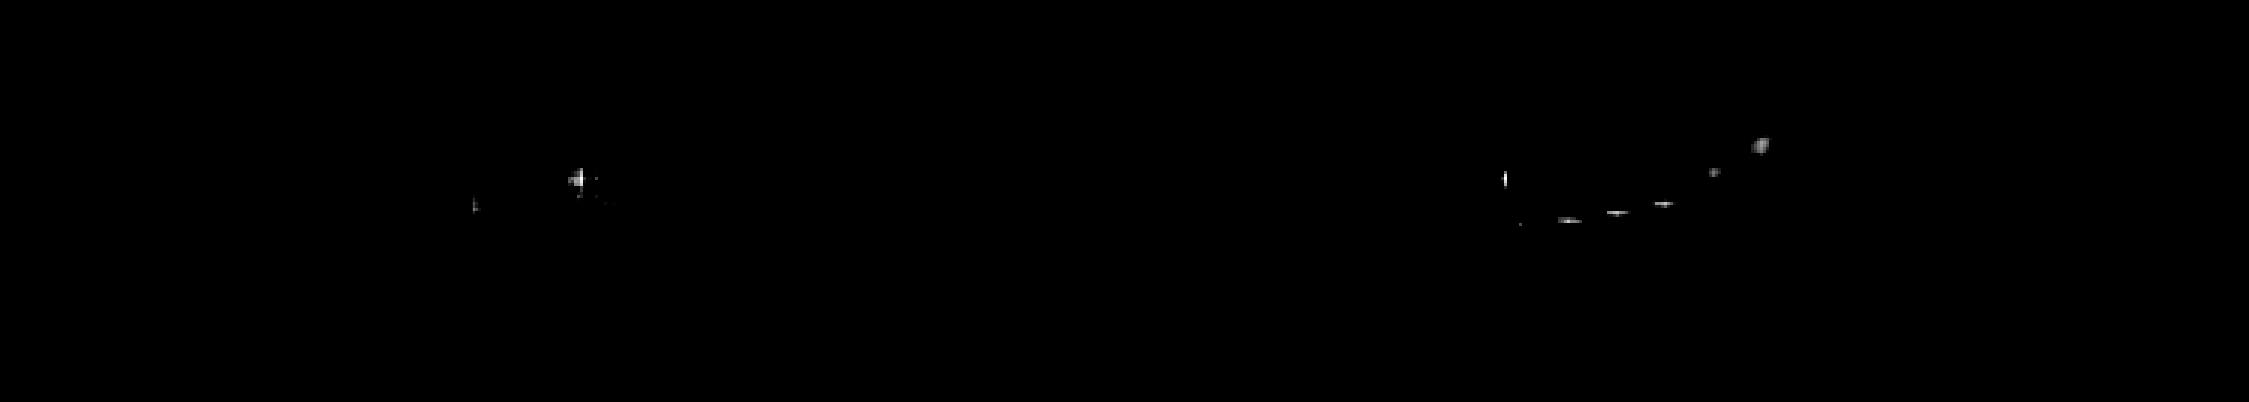

In [8]:
for x, y in data_loader:
    for i in range(len(x)):
        multiplot([*x[i], y[i].squeeze()])